In [2]:
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
# data = pd.read_csv("household_power_consumption.txt", sep=";")
_data = pd.read_excel("/home/aumaron/Desktop/datasets/fidelity_people_analytics.xlsx", engine='openpyxl', sheet_name="Joiners")
# data['Hire Date'] = data['Hire Date'].apply(lambda x: try_parsing_date(x))
_data['Hire Date'].dt.to_period("M")
g = _data.groupby(_data['Hire Date'].dt.to_period("M"))
data = g.sum()
print(len(data.index.tolist()))
data['perc_chg'] = data['FTE'] #.pct_change()*100
# data.fillna(value={"perc_chg": 0}, inplace=True)
time_series_for_model = data
time_series_for_model.reset_index(inplace=True)

60


In [3]:
data["Hire Date"] = pd.to_datetime(data["Hire Date"])

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead

In [46]:
time_series = data.groupby(["Date"]).aggregate({"Sub_metering_3": "sum"}).reset_index()
time_series_for_model = time_series[:200]

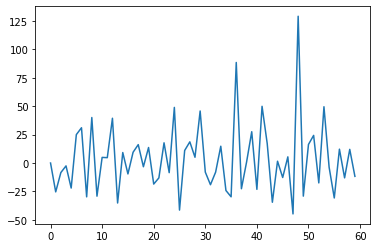

In [29]:
plt.plot(time_series_for_model["perc_chg"].tolist())

# 1. PEWMA

## Step 1: Find the SMA for a given span

In [4]:
span = 10
alpha = 2 / (span + 1)
alpha

0.18181818181818182

In [64]:
# Taking the first element as is for the next day's prediction
# for i in range(len(time_series_for_model)):
# time_series_for_model[""]
time_series_for_model


,Hire Date,Cost Code,FTE,perc_chg,ewm_pandas,ewm_pandas_std,ema,std,ema_outliers,diffsq
0,2015-01,834109102,231.2282,231.2282,231.228200,NaN,231.2282,None,NaN,0.000000
1,2015-02,613028117,172.5543,172.5543,220.560218,41.488713,220.560218,41.488713,NaN,860.656635
2,2015-03,573918808,158.1133,158.1133,209.206233,44.850515,209.206233,26.678025,NaN,851.781736
3,2015-04,596675830,154.1154,154.1154,199.189718,44.879417,199.189718,26.490807,NaN,619.382679
4,2015-05,456763201,120.1981,120.1981,184.827606,52.287350,184.827606,22.618226,NaN,2213.115355
5,2015-06,592737009,150.2428,150.2428,178.539459,47.892920,178.539459,42.600976,NaN,200.672251
6,2015-07,750967715,196.8714,196.8714,181.872539,42.966063,181.872539,13.112285,NaN,774.240960
7,2015-08,539140776,138.3000,138.3000,173.950259,42.385682,173.950259,25.216144,NaN,723.768046
8,2015-09,642909190,193.6667,193.6667,177.535067,38.811763,177.535067,24.428643,NaN,640.146786
9,2015-10,500772980,137.2000,137.2000,170.201418,38.625863,170.201418,22.982559,NaN,786.747523


In [17]:
time_series_for_model["ewm_pandas_18"] = time_series_for_model["perc_chg"].ewm(alpha=0.18181818, adjust=False).mean()
time_series_for_model["ewm_pandas_std_18"] = time_series_for_model["perc_chg"].ewm(alpha=0.18181818, adjust=False).std
abs(pd.Series(time_series_for_model["perc_chg"]) - ewm)

0      0.000000
1     48.005918
2     51.092933
3     45.074318
4     64.629506
5     28.296659
6     14.998861
7     35.650259
8     16.131633
9     33.001418
10    21.437524
11    11.976156
12    38.801327
13    28.717096
14    13.207170
15    22.485412
16     7.951673
17    12.994058
18     6.049684
19    23.452351
20     9.301949
21    24.050331
22     0.286635
23    11.116338
24    48.434697
25    32.850821
26    15.552017
27     8.501631
28    13.816908
29    76.309288
30    45.878390
31     1.197892
32    11.383043
33    11.640647
34    29.830380
35    61.061220
36    26.765247
37    15.061952
38    11.259779
39    25.918626
40    16.461388
41    48.912146
42    72.215874
43    16.682257
44    11.369911
45    27.904018
46    15.908742
47    73.187625
48    35.998343
49    20.081828
50     3.287595
51    36.808032
52     0.390819
53    70.943875
54    50.153543
55    22.676446
56     1.056065
57    21.879626
58     1.058667
59    19.253346
dtype: float64

In [8]:
ewm_std

0           NaN
1     41.488713
2     44.850515
3     44.879417
4     52.287350
5     47.892920
6     42.966063
7     42.385682
8     38.811763
9     38.625863
10    36.402746
11    33.369346
12    35.807222
13    35.368721
14    32.632599
15    31.549405
16    28.798819
17    26.831839
18    24.451568
19    24.998557
20    23.077990
21    24.053315
22    21.756722
23    20.439826
24    30.349493
25    31.938678
26    29.905178
27    27.378015
28    25.698385
29    44.476371
30    46.240600
31    41.830391
32    38.257433
33    35.085230
34    35.026792
35    43.868196
36    41.849822
37    38.587368
38    35.349182
39    34.470878
40    32.235159
41    37.959094
42    49.664871
43    45.681968
44    41.705348
45    40.191398
46    37.204027
47    49.548490
48    48.256089
49    44.775378
50    40.533786
51    40.973028
52    37.062007
53    48.647431
54    50.570422
55    47.110083
56    42.615904
57    40.051398
58    36.231672
59    34.140648
dtype: float64

In [18]:
span = 10
alpha = 2/(span + 1)
ewma = []
ewma_std = []
std = []
for i in range(0, len(pd.Series(time_series_for_model["perc_chg"]))):
    t = len(pd.Series(time_series_for_model["perc_chg"]))
    z = np.array(pd.Series(time_series_for_model["perc_chg"])[0:i+1].tolist())
#     print(z)
    std.insert(i, np.std(z, ddof=1))
    n = len(z)
    if i == 0:
        ewma.insert(0, z[i])
        ewma_std.insert(0, np.nan)
    elif i == 1:
        ewma.insert(i, (1 - alpha) * ewma[i-1] + (alpha * z[i]))
        ewma_std.insert(1, np.std(z, ddof=1))
    else:
        ewma.insert(i, (1 - alpha) * ewma[i-1] + (alpha * z[i]))
        return_sq = ((z[i] - z[i-1]) / z[i-1])**2
#         ewma_std.insert(i, np.sqrt((alpha)*ewma_std[i-1]**2 + ((1-alpha)*return_sq)))
        ewma_std.insert(i, np.sqrt((1-alpha)*(ewma_std[i-1]**2+(alpha*(z[i] - ewma[i-1])**2))))
    if i == t:
        w = (1-alpha)**np.arange(n-1, -1, -1)
    else:
        w = alpha * (1-alpha)**np.arange(n-1, -1, -1)

    bias = np.sum(w)**2 / (np.sum(w)**2 - np.sum(w**2))

    var = bias = np.sum(w)**2 / (np.sum(w)**2 - np.sum(w**2))
    ewmvar = bias * np.sum(w * (z - ewma)**2) / np.sum(w)
    ewmstd = np.sqrt(ewmvar)
    if i == 1:
        ewmstd = np.std(z, ddof=1)
    print((i, ewma_std[i], ewmstd, time_series_for_model["ewm_pandas_std"].values[i]))


(0, nan, nan, nan)
(1, 41.48871256866131, 41.48871256866131, 41.488712568661306)
(2, 44.59210270084567, 52.41738447696601, 44.850515080847416)
(3, 45.589536340353554, 50.50294504763498, 44.87941733474113)
(4, 51.27114272872611, 56.91471823975276, 52.28735018937843)
(5, 48.25673725978338, 50.64359664947414, 47.892920460171176)
(6, 44.21880582465038, 44.3118187923395, 42.96606310075859)
(7, 43.38461159421265, 42.786407938522466, 42.38568172684455)
(8, 39.9728743068205, 38.470385784754235, 38.81176318279242)
(9, 39.36161598794038, 37.69956312793158, 38.62586255088074)
(10, 37.010340555195334, 35.070989923062065, 36.40274553523642)
(11, 33.9498163288546, 31.80034889099415, 33.369345913624656)
(12, 35.74343728804808, 33.81480935955601, 35.80722161328632)
(13, 35.05087695362447, 33.149069743353365, 35.368721149697734)
(14, 32.310227175803455, 30.39338212209518, 32.63259931123451)
(15, 31.08851411230161, 29.232340438430718, 31.549405330737113)
(16, 28.369351932869105, 26.569571563504436, 28.7

/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in double_scalars
/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars
/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


In [67]:
series = time_series_for_model["perc_chg"].tolist()
_mean_series = pd.Series(series).ewm(span=10, adjust=False).mean()
_mean_std = pd.Series(series).ewm(span=10, adjust=False).std()

0           NaN
1     41.488713
2     44.850515
3     44.879417
4     52.287350
5     47.892920
6     42.966063
7     42.385682
8     38.811763
9     38.625863
10    36.402746
11    33.369346
12    35.807222
13    35.368721
14    32.632599
15    31.549405
16    28.798819
17    26.831839
18    24.451568
19    24.998557
20    23.077990
21    24.053315
22    21.756722
23    20.439826
24    30.349493
25    31.938678
26    29.905178
27    27.378015
28    25.698385
29    44.476371
30    46.240600
31    41.830391
32    38.257433
33    35.085230
34    35.026792
35    43.868196
36    41.849822
37    38.587368
38    35.349182
39    34.470878
40    32.235159
41    37.959094
42    49.664871
43    45.681968
44    41.705348
45    40.191398
46    37.204027
47    49.548490
48    48.256089
49    44.775378
50    40.533786
51    40.973028
52    37.062007
53    48.647431
54    50.570422
55    47.110083
56    42.615904
57    40.051398
58    36.231672
59    34.140648
dtype: float64

In [12]:
# def _get_sum_squared(list_of_numbers):
    
#     sq = 0
#     for i in range(len(list_of_numbers)):
#         mean = sum(list_of_numbers[:i]) / len(list_of_numbers[:i])
#         diff = list_of_numbers[i] - mean
#         sq += (diff)**2
    
#     return sq
    

# time_series_for_model["ema"] = None
# time_series_for_model["std"] = None
# for i in range(0, len(time_series_for_model)):
# #     time_series_for_model.loc[i, "std"] = time_series_for_model.loc[:i, "Total Profit"].std()
#     time_series_for_model["diffsq"] = time_series_for_model["diffsq"].apply(lambda x: _get_sum_squared(x))
#     if i == 1:
#         time_series_for_model.loc[i, "std"] = time_series_for_model.loc[:i, "perc_chg"].std()
#     if i == 0:
#         time_series_for_model.loc[i, "ema"] = time_series_for_model.loc[i, "perc_chg"]
#     else:
#         if i > 1:
#             time_series_for_model.loc[i, "std"] = np.sqrt((1 - alpha) * time_series_for_model.loc[i-1, "diffsq"] + (alpha * time_series_for_model.loc[i-1, "std"]))
#         time_series_for_model.loc[i, "ema"] = (1 - alpha) * time_series_for_model.loc[i-1, "ema"] + (alpha * time_series_for_model.loc[i, "perc_chg"])
time_series_for_model["diff"] = time_series_for_model["perc_chg"] - time_series_for_model["ewm_pandas"]
time_series_for_model.loc[abs(time_series_for_model["diff"]) > (2 * time_series_for_model["ewm_pandas_std"]), "ema_outliers"] = "outliers"
time_series_for_model[time_series_for_model["ema_outliers"] == "outliers"]

,Hire Date,Cost Code,FTE,perc_chg,ewm_pandas,ewm_pandas_std,ema_outliers,diff


In [56]:
# Period
T = 10
# current period 
t = 1
beta = 0

time_series_for_model["pewma"] = None
for i in range(len(time_series_for_model)):
    alpha = 0
    if i == 0:
        time_series_for_model.loc[i, "pewma"] = time_series_for_model.loc[i, "Sub_metering_3"]
        t += 1
    else:
        if t <= T:
            alpha = 1 - (1 - 1/t)
            z = time_series_for_model.loc[i, "Sub_metering_3"] - time_series_for_model.loc[i-1, "pewma"]
            p = norm.pdf(z / time_series_for_model.loc[i, "std"]) if time_series_for_model.loc[i, "std"] != np.nan else 0 
            probability_factor = (1 - beta * p) 
            time_series_for_model.loc[i, "pewma"] = (1 - alpha * probability_factor) * time_series_for_model.loc[i, "Sub_metering_3"] + (alpha * probability_factor * time_series_for_model.loc[i-1, "pewma"])
            t += 1
        else:
            z = (time_series_for_model.loc[i, "Sub_metering_3"] - time_series_for_model.loc[i-1, "pewma"])
            p = norm.pdf(z / time_series_for_model.loc[i, "std"]) if time_series_for_model.loc[i, "std"] != np.nan else 0
            alpha = (1 - beta * p) * prev_alpha
            probability_factor = (1 - beta * p)
            time_series_for_model.loc[i, "pewma"] = (1 - alpha * probability_factor) * time_series_for_model.loc[i, "Sub_metering_3"] + (alpha * probability_factor * time_series_for_model.loc[i-1, "pewma"])
            t += 1
    prev_alpha = alpha
    
time_series_for_model
# time_series_for_model.loc[abs(time_series_for_model["Sub_metering_3"] - time_series_for_model["pewma"]) > (2 * time_series_for_model["std"]), "pewma_outliers"] = "outliers"
# time_series_for_model[time_series_for_model["pewma_outliers"] == "outliers"]

/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/aumaron/Desktop/other_projects/venv/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Date,Sub_metering_3,ewm_pandas,ema,std,ema_outliers,pewma,pewma_outliers
0,2006-12-16,4926.0,4926.000000,4926.0,NaN,NaN,4926.0,NaN
1,2006-12-17,13341.0,6456.000000,6456.0,5950.303564,NaN,9133.5,NaN
2,2006-12-18,14018.0,7830.909091,7830.909091,5065.159063,NaN,12389.833333,NaN
3,2006-12-19,6197.0,7533.834711,7533.834711,4723.657093,NaN,7745.208333,NaN
4,2006-12-20,14063.0,8720.955672,8720.955672,4547.731687,NaN,12799.441667,NaN
...,...,...,...,...,...,...,...,...
195,2007-06-29,6797.0,6175.168845,6175.168845,3929.279502,NaN,7046.594895,NaN
196,2007-06-30,8376.0,6575.319964,6575.319964,3919.252553,NaN,8243.059489,NaN
197,2007-07-01,12810.0,7708.898152,7708.898152,3922.670717,NaN,12353.305949,NaN
198,2007-07-02,11986.0,8486.553034,8486.553034,3921.570428,NaN,12022.730595,NaN


In [54]:
time_series_for_model[time_series_for_model["pewma"] == time_series_for_model["Sub_metering_3"]]

,Date,Sub_metering_3,ewm_pandas,ema,std,ema_outliers,pewma,pewma_outliers
0,2006-12-16,4926.0,4926.000000,4926.0,NaN,NaN,4926.0,NaN
127,2007-04-22,11102.0,7039.345711,7039.345711,4213.644377,NaN,11102.0,NaN
129,2007-04-24,6680.0,6820.140517,6820.140517,4194.444849,NaN,6680.0,NaN
131,2007-04-26,7163.0,7178.788280,7178.78828,4165.438233,NaN,7163.0,NaN
132,2007-04-27,4756.0,6738.281320,6738.28132,4165.876340,NaN,4756.0,NaN
...,...,...,...,...,...,...,...,...
195,2007-06-29,6797.0,6175.168845,6175.168845,3929.279502,NaN,6797.0,NaN
196,2007-06-30,8376.0,6575.319964,6575.319964,3919.252553,NaN,8376.0,NaN
197,2007-07-01,12810.0,7708.898152,7708.898152,3922.670717,NaN,12810.0,NaN
198,2007-07-02,11986.0,8486.553034,8486.553034,3921.570428,NaN,11986.0,NaN
